In [1]:
import gym
from src import algo

2022-01-26 01:10:32.817711: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-26 01:10:32.817749: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Creating the environment
from env.SimpleMaze import SimpleMaze
env = SimpleMaze(3,5,True)

Map:
G * 0 * 0 
0 0 0 0 0 
X 0 * 0 0 


In [3]:
# Training an RL agent in the environment using given algorithm
model, agent = algo.dqn(env)

2022-01-26 01:10:36.156920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 01:10:36.158447: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-26 01:10:36.158793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-01-26 01:10:36.159118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-01-26 01:10:36.159418: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Training for 50000 steps ...
Interval 1 (0 steps performed)
   84/10000 [..............................] - ETA: 12s - reward: -0.4048

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 95s 10ms/step - reward: -1.8240
196 episodes - episode_reward: -92.954 [-3679.000, 35.000] - loss: 25.813 - mse: 919.004 - mean_q: -31.600

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 97s 10ms/step - reward: -1.2384
286 episodes - episode_reward: -43.402 [-1752.000, 37.000] - loss: 38.469 - mse: 1092.725 - mean_q: -36.970

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 99s 10ms/step - reward: -1.2346
295 episodes - episode_reward: -40.925 [-1508.000, 36.000] - loss: 32.581 - mse: 697.719 - mean_q: -29.280

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 103s 10ms/step - reward: -0.6452
375 episodes - episode_reward: -17.909 [-829.000, 41.000] - loss: 27.827 - mse: 429.551 - mean_q: -22.493

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 107s 11ms/step - reward: -0.5698
done, took 501.128 seconds


In [31]:
# Testing the trained RL agent on the environment for one episode
agent.test(env, nb_episodes=1, visualize=True)

Testing for 1 episodes ...

Next action:Move down
Map:
0 0 * * 0 
0 S 0 0 0 
G X * 0 0 

Next action:Move right
Map:
0 0 * * 0 
0 S 0 0 0 
G 0 X 0 0 

Next action:Move right
Map:
0 0 * * 0 
0 S 0 0 0 
G 0 0 X 0 

Next action:Move up
Map:
0 0 * * 0 
0 S 0 X 0 
G 0 0 0 0 

Next action:Move up
Map:
0 0 * X 0 
0 S 0 0 0 
G 0 0 0 0 

Next action:Move left
Map:
0 0 X 0 0 
0 S 0 0 0 
G 0 0 0 0 

Next action:Move left
Map:
0 X 0 0 0 
0 S 0 0 0 
G 0 0 0 0 

Next action:Move left
Map:
X 0 0 0 0 
0 S 0 0 0 
G 0 0 0 0 

Next action:Move down
Map:
0 0 0 0 0 
X S 0 0 0 
G 0 0 0 0 

Next action:Move down
Map:
0 0 0 0 0 
0 S 0 0 0 
X 0 0 0 0 
Episode 1: reward: 24.000, steps: 10


In [10]:
# Generating dataset for ANN to DT conversion
from src.data import dataset
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename,500000)

100%|██████████████████████████████████| 499849/499849 [13:04<00:00, 637.37it/s]


In [11]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename)

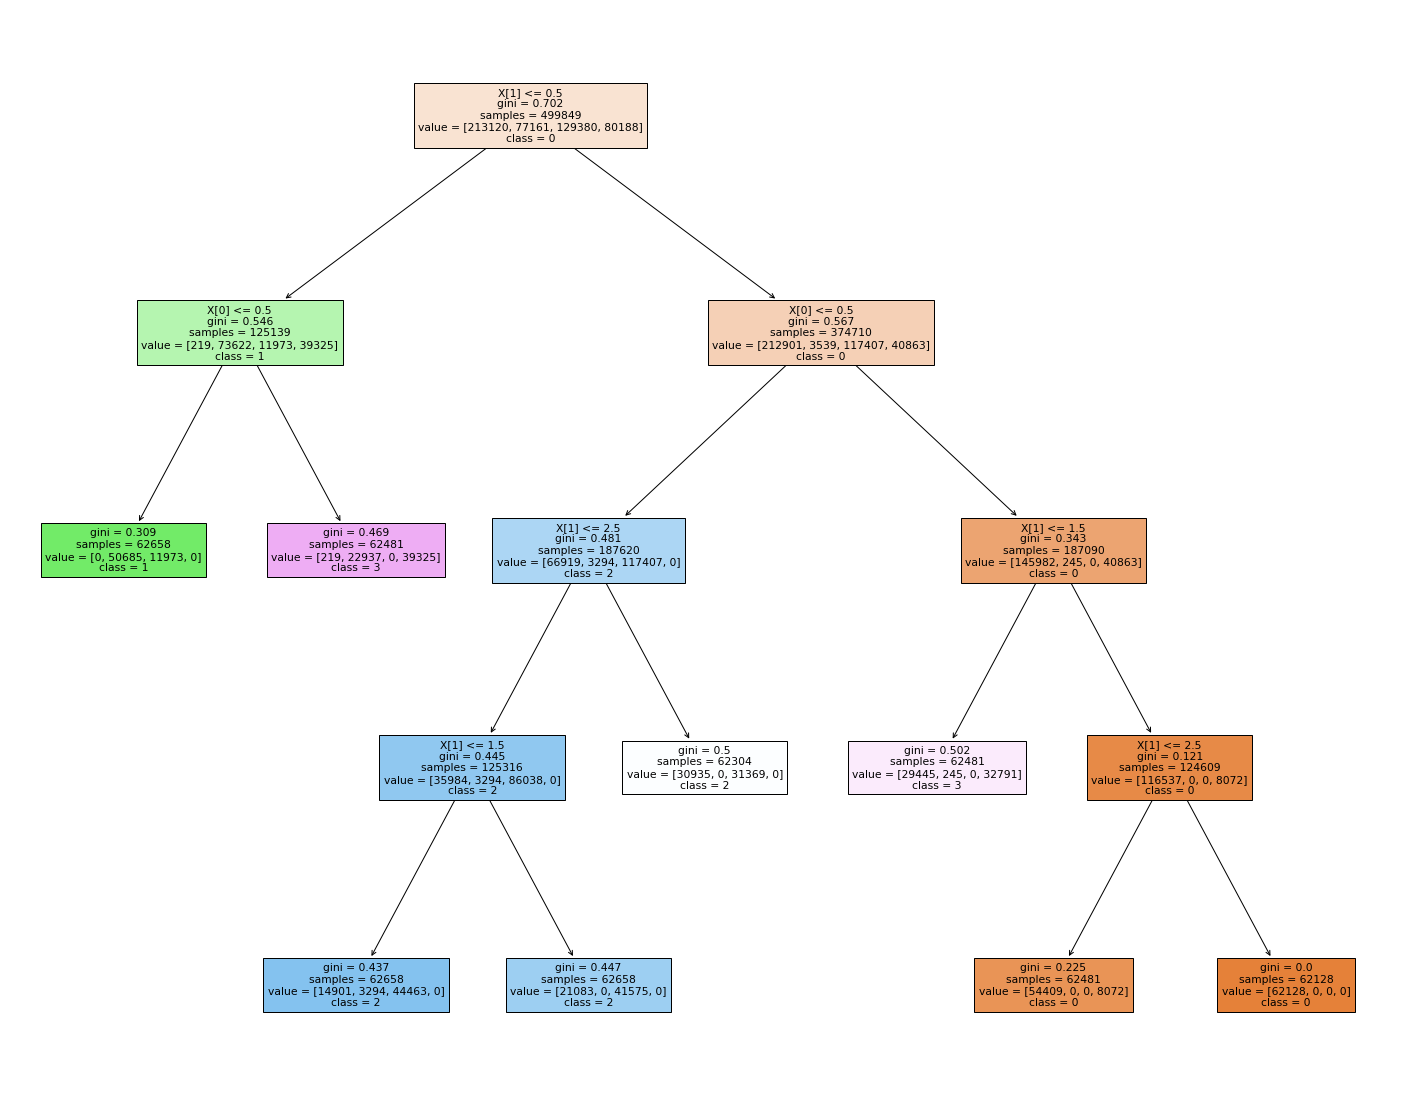

In [12]:
# Visualizing the DT
from src.tree import visualize_tree
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [13]:
# Testing DT against ANN for accuracy
from src.tree import test_tree
test_tree(env,model,Tree,318300)

100%|██████████████████████████████████| 318300/318300 [09:47<00:00, 542.16it/s]

Instances checked: 318300
Predictions matched: 236813
Accuracy: 74.39930882814954%
